# Term Deposit Marketing

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

Import necessary libraries

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

## Data Description

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

Attributes:

- age : age of customer (numeric)

- job : type of job (categorical)

- marital : marital status (categorical)

- education (categorical)

- default: has credit in default? (binary)

- balance: average yearly balance, in euros (numeric)

- housing: has a housing loan? (binary)

- loan: has personal loan? (binary)

- contact: contact communication type (categorical)

- day: last contact day of the month (numeric)

- month: last contact month of year (categorical)

- duration: last contact duration, in seconds (numeric)

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

- y - has the client subscribed to a term deposit? (binary)

In [3]:
df = pd.read_csv('term-deposit-marketing-2020.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


## Exploratory Data Analysis

This step investigate the following steps:
- Check for missing values
- Investigate the distribution of numerical variables
- Idenitfy number of categories in categorical features
- Compute the correlation between input and output variables

1. Check for missing value

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

This data set does not contain any missing values.

2. Investigate the distribution of numerical variables

In [6]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>, <Axes: >]], dtype=object)

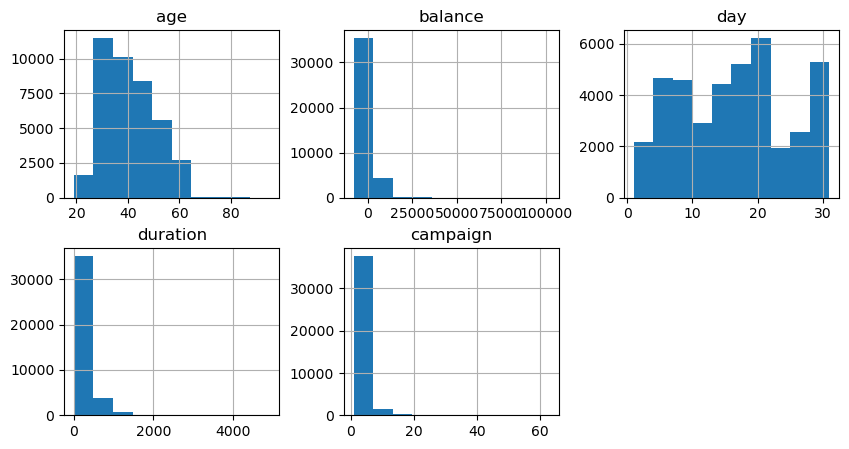

In [7]:
df.hist(figsize=(10, 5), layout=(2, 3))

The difference in range of numerical features is considerable. Standarization ('age' and 'day') might help increase the model accuracy. Other variables are positively skewed and has large outliers.

3. Idenitfy number of categories in categorical features

In [8]:
print('Number of unique values/Categories:')
for col in df.columns:
    print('- '+col+': ', df[col].nunique())

Number of unique values/Categories:
- age:  70
- job:  12
- marital:  3
- education:  4
- default:  2
- balance:  6849
- housing:  2
- loan:  2
- contact:  3
- day:  31
- month:  11
- duration:  1535
- campaign:  48
- y:  2


'education' and 'marital' are categorial object with 4 and 3 unique values, respectively.

In [9]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [10]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
df_dummies = pd.get_dummies(df, columns=['job', 'marital', 'default', 'housing', 'loan', 'contact'], drop_first=True, dtype=float)

In [12]:
df_dummies.head()

,age,education,balance,day,month,duration,campaign,y,job_blue-collar,job_entrepreneur,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,tertiary,2143,5,may,261,1,no,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,44,secondary,29,5,may,151,1,no,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,33,secondary,2,5,may,76,1,no,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,47,unknown,1506,5,may,92,1,no,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,33,unknown,1,5,may,198,1,no,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
education_dict = {'tertiary': 3, 'secondary': 2, 'unknown': 0, 'primary': 1}
df_dummies['ordinal_education'] = df_dummies.education.map(education_dict)
df_dummies = df_dummies.drop('education', axis=1)
df_dummies.head()

,age,balance,day,month,duration,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unemployed,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,ordinal_education
0,58,2143,5,may,261,1,no,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3
1,44,29,5,may,151,1,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2
2,33,2,5,may,76,1,no,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2
3,47,1506,5,may,92,1,no,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,33,1,5,may,198,1,no,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [14]:
cat_columns = df_dummies.select_dtypes(['object']).columns
cat_columns

Index(['month', 'y'], dtype='object')

In [15]:
df_dummies[cat_columns] = df_dummies[cat_columns].apply(lambda x: pd.factorize(x)[0])
df_dummies.head()

,age,balance,day,month,duration,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unemployed,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,ordinal_education
0,58,2143,5,0,261,1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3
1,44,29,5,0,151,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2
2,33,2,5,0,76,1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2
3,47,1506,5,0,92,1,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,33,1,5,0,198,1,0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


4. Compute the correlation between input and output variables 

In [16]:
df_dummies.corr().style.background_gradient(cmap='coolwarm')

,age,balance,day,month,duration,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,ordinal_education
age,1.000000,0.081517,-0.011689,0.022965,-0.036270,0.016204,-0.020273,-0.028956,0.027956,0.084920,-0.005302,0.333164,0.001712,-0.057227,-0.155146,-0.058308,0.008052,0.043904,0.265630,-0.408589,-0.014857,-0.179606,0.000041,0.120689,0.010386,-0.161471
balance,0.081517,1.000000,0.011662,0.059003,0.014072,-0.008137,0.030232,-0.041461,0.011692,0.003044,0.072172,0.015917,0.015771,-0.033618,0.000575,-0.012655,0.010020,0.010672,0.023683,-0.007168,-0.070069,-0.049946,-0.080596,0.029116,-0.018851,0.052765
day,-0.011689,0.011662,1.000000,0.029379,-0.032983,0.165429,-0.006420,-0.035006,-0.003629,0.005355,0.026526,-0.002787,0.005080,-0.009461,-0.011183,0.031902,-0.005475,-0.009526,0.005243,-0.002806,0.006287,-0.050622,0.005838,0.037242,-0.054363,0.032272
month,0.022965,0.059003,0.029379,1.000000,0.015157,-0.069674,0.106168,-0.096244,0.000201,-0.004050,0.057380,0.022085,0.020090,-0.031792,0.032897,0.017347,0.061696,-0.003019,-0.011074,0.024891,-0.024357,-0.167039,-0.014806,0.077645,-0.506906,0.085241
duration,-0.036270,0.014072,-0.032983,0.015157,1.000000,-0.088387,0.461169,0.015951,0.000247,-0.007239,-0.010846,0.001675,0.008821,0.003569,-0.007175,-0.008469,0.017896,-0.007971,-0.029153,0.026703,-0.008597,0.022455,-0.003952,-0.040379,0.001928,0.004813
campaign,0.016204,-0.008137,0.165429,-0.069674,-0.088387,1.000000,-0.040350,-0.004635,-0.002619,0.002804,0.021105,-0.013881,0.004581,-0.010404,-0.008503,0.018915,-0.017052,0.017037,0.027962,-0.016179,0.012135,-0.054823,0.000582,0.061620,-0.012468,0.006220
y,-0.020273,0.030232,-0.006420,0.106168,0.461169,-0.040350,1.000000,-0.032859,-0.007191,-0.015248,0.020291,0.024343,0.005029,-0.014645,0.037384,0.000234,0.009463,-0.000018,-0.056863,0.051721,-0.006559,-0.054336,-0.031029,-0.000842,-0.088408,0.043828
job_blue-collar,-0.028956,-0.041461,-0.035006,-0.096244,0.015951,-0.004635,-0.032859,1.000000,-0.105624,-0.092525,-0.280381,-0.106864,-0.105974,-0.182215,-0.063781,-0.251692,-0.093266,-0.042557,0.125618,-0.087522,0.004706,0.156122,0.005674,0.006448,0.116781,-0.374273
job_entrepreneur,0.027956,0.011692,-0.003629,0.000201,0.000247,-0.002619,-0.007191,-0.105624,1.000000,-0.031889,-0.096634,-0.036831,-0.036524,-0.062801,-0.021982,-0.086747,-0.032144,-0.014667,0.044941,-0.048960,0.025645,0.003303,0.038244,-0.006114,-0.002439,0.045729
job_housemaid,0.084920,0.003044,0.005355,-0.004050,-0.007239,0.002804,-0.015248,-0.092525,-0.031889,1.000000,-0.084650,-0.032263,-0.031995,-0.055013,-0.019256,-0.075988,-0.028158,-0.012848,0.046431,-0.061803,0.000017,-0.086038,-0.016788,0.037439,-0.003592,-0.108081


- Input feature 'duration' has 0.461 correlation to output variable 'y'. This is expected as longer call duration can signify that customer is interested and might end up subscribing.

- 'job_management' and 'ordinal_education' has correlation 0.455.

- 'job_retired' and 'age' has correlation value 0.33.

## Training

In [21]:
X = df_dummies.loc[:, ~df_dummies.columns.isin(['y'])]
y = df_dummies['y']

In [23]:
X.describe(), y.describe()

(                age        balance           day         month      duration  \
 count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000   
 mean      40.544600    1274.277550     16.017225      2.690725    254.824300   
 std        9.641776    2903.769716      8.278127      3.068234    259.366498   
 min       19.000000   -8019.000000      1.000000      0.000000      0.000000   
 25%       33.000000      54.000000      8.000000      0.000000    100.000000   
 50%       39.000000     407.000000     17.000000      2.000000    175.000000   
 75%       48.000000    1319.000000     21.000000      5.000000    313.000000   
 max       95.000000  102127.000000     31.000000     10.000000   4918.000000   
 
            campaign  job_blue-collar  job_entrepreneur  job_housemaid  \
 count  40000.000000     40000.000000      40000.000000   40000.000000   
 mean       2.882175         0.234575          0.035125       0.027175   
 std        3.239051         0.423738          

In [24]:
model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],), activation='relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2600      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [25]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(X, y, epochs=1000, batch_size=10, validation_split=0.3, shuffle=True, verbose=1)

Epoch 1/1000
   1/2800 [..............................] - ETA: 7:52 - loss: 94.0049 - accuracy: 0.3000

2023-11-14 04:16:24.933608: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2800/2800 [==============================] - 2s 698us/step - loss: 1.9769 - accuracy: 0.9080 - val_loss: 0.4656 - val_accuracy: 0.8762
Epoch 2/1000
2800/2800 [==============================] - 2s 568us/step - loss: 0.2298 - accuracy: 0.9477 - val_loss: 0.4011 - val_accuracy: 0.8762
Epoch 3/1000
2800/2800 [==============================] - 2s 652us/step - loss: 0.1891 - accuracy: 0.9491 - val_loss: 0.3642 - val_accuracy: 0.8764
Epoch 4/1000
2800/2800 [==============================] - 2s 572us/step - loss: 0.1709 - accuracy: 0.9498 - val_loss: 0.3661 - val_accuracy: 0.8767
Epoch 5/1000
2800/2800 [==============================] - 2s 804us/step - loss: 0.1613 - accuracy: 0.9502 - val_loss: 0.3522 - val_accuracy: 0.8783
Epoch 6/1000
2800/2800 [==============================] - 2s 811us/step - loss: 0.1583 - accuracy: 0.9501 - val_loss: 0.3797 - val_accuracy: 0.8763
Epoch 7/1000
2800/2800 [==============================] - 2s 707us/step - loss: 0.1515 - accuracy: 0.9501 - val_loss: 0.4032 

2800/2800 [==============================] - 2s 593us/step - loss: 0.1368 - accuracy: 0.9503 - val_loss: 0.4179 - val_accuracy: 0.8764
Epoch 57/1000
2800/2800 [==============================] - 2s 849us/step - loss: 0.1294 - accuracy: 0.9499 - val_loss: 0.3802 - val_accuracy: 0.8789
Epoch 58/1000
2800/2800 [==============================] - 2s 728us/step - loss: 0.1352 - accuracy: 0.9509 - val_loss: 0.3358 - val_accuracy: 0.8762
Epoch 59/1000
2800/2800 [==============================] - 2s 717us/step - loss: 0.1329 - accuracy: 0.9498 - val_loss: 0.3548 - val_accuracy: 0.8770
Epoch 60/1000
2800/2800 [==============================] - 2s 588us/step - loss: 0.1310 - accuracy: 0.9513 - val_loss: 0.3659 - val_accuracy: 0.8797
Epoch 61/1000
2800/2800 [==============================] - 2s 648us/step - loss: 0.1316 - accuracy: 0.9497 - val_loss: 0.3720 - val_accuracy: 0.8763
Epoch 62/1000
2800/2800 [==============================] - 2s 825us/step - loss: 0.1317 - accuracy: 0.9505 - val_loss: 0

2800/2800 [==============================] - 2s 591us/step - loss: 0.1312 - accuracy: 0.9500 - val_loss: 0.4796 - val_accuracy: 0.8799
Epoch 112/1000
2800/2800 [==============================] - 2s 591us/step - loss: 0.1309 - accuracy: 0.9502 - val_loss: 0.4067 - val_accuracy: 0.8763
Epoch 113/1000
2800/2800 [==============================] - 2s 732us/step - loss: 0.1343 - accuracy: 0.9515 - val_loss: 0.3693 - val_accuracy: 0.8796
Epoch 114/1000
2800/2800 [==============================] - 2s 576us/step - loss: 0.1320 - accuracy: 0.9500 - val_loss: 0.3490 - val_accuracy: 0.8765
Epoch 115/1000
2800/2800 [==============================] - 2s 587us/step - loss: 0.1281 - accuracy: 0.9504 - val_loss: 0.3248 - val_accuracy: 0.8768
Epoch 116/1000
2800/2800 [==============================] - 2s 564us/step - loss: 0.1292 - accuracy: 0.9506 - val_loss: 0.3663 - val_accuracy: 0.8785
Epoch 117/1000
2800/2800 [==============================] - 2s 569us/step - loss: 0.1314 - accuracy: 0.9496 - val_l

Epoch 166/1000
2800/2800 [==============================] - 2s 641us/step - loss: 0.1298 - accuracy: 0.9507 - val_loss: 0.3618 - val_accuracy: 0.8762
Epoch 167/1000
2800/2800 [==============================] - 2s 598us/step - loss: 0.1309 - accuracy: 0.9505 - val_loss: 0.3899 - val_accuracy: 0.8761
Epoch 168/1000
2800/2800 [==============================] - 2s 643us/step - loss: 0.1279 - accuracy: 0.9495 - val_loss: 0.4847 - val_accuracy: 0.8765
Epoch 169/1000
2800/2800 [==============================] - 2s 629us/step - loss: 0.1281 - accuracy: 0.9493 - val_loss: 0.3776 - val_accuracy: 0.8763
Epoch 170/1000
2800/2800 [==============================] - 2s 593us/step - loss: 0.1264 - accuracy: 0.9496 - val_loss: 0.3669 - val_accuracy: 0.8772
Epoch 171/1000
2800/2800 [==============================] - 2s 762us/step - loss: 0.1252 - accuracy: 0.9514 - val_loss: 0.4332 - val_accuracy: 0.8763
Epoch 172/1000
2800/2800 [==============================] - 2s 629us/step - loss: 0.1266 - accuracy:

2800/2800 [==============================] - 2s 769us/step - loss: 0.1268 - accuracy: 0.9500 - val_loss: 0.4195 - val_accuracy: 0.8762
Epoch 221/1000
2800/2800 [==============================] - 2s 622us/step - loss: 0.1348 - accuracy: 0.9499 - val_loss: 0.4140 - val_accuracy: 0.8765
Epoch 222/1000
2800/2800 [==============================] - 2s 821us/step - loss: 0.1284 - accuracy: 0.9504 - val_loss: 0.3384 - val_accuracy: 0.8762
Epoch 223/1000
2800/2800 [==============================] - 2s 752us/step - loss: 0.1245 - accuracy: 0.9505 - val_loss: 0.4031 - val_accuracy: 0.8763
Epoch 224/1000
2800/2800 [==============================] - 2s 674us/step - loss: 0.1273 - accuracy: 0.9511 - val_loss: 0.3836 - val_accuracy: 0.8763
Epoch 225/1000
2800/2800 [==============================] - 2s 856us/step - loss: 0.1359 - accuracy: 0.9499 - val_loss: 0.4121 - val_accuracy: 0.8743
Epoch 226/1000
2800/2800 [==============================] - 2s 711us/step - loss: 0.1301 - accuracy: 0.9504 - val_l

Epoch 275/1000
2800/2800 [==============================] - 2s 721us/step - loss: 0.1267 - accuracy: 0.9501 - val_loss: 0.4619 - val_accuracy: 0.8778
Epoch 276/1000
2800/2800 [==============================] - 2s 641us/step - loss: 0.1287 - accuracy: 0.9507 - val_loss: 0.3724 - val_accuracy: 0.8772
Epoch 277/1000
2800/2800 [==============================] - 2s 614us/step - loss: 0.1285 - accuracy: 0.9504 - val_loss: 0.3734 - val_accuracy: 0.8762
Epoch 278/1000
2800/2800 [==============================] - 2s 704us/step - loss: 0.1262 - accuracy: 0.9505 - val_loss: 0.3668 - val_accuracy: 0.8762
Epoch 279/1000
2800/2800 [==============================] - 2s 733us/step - loss: 0.1329 - accuracy: 0.9495 - val_loss: 0.3603 - val_accuracy: 0.8774
Epoch 280/1000
2800/2800 [==============================] - 2s 737us/step - loss: 0.1289 - accuracy: 0.9504 - val_loss: 0.4343 - val_accuracy: 0.8765
Epoch 281/1000
2800/2800 [==============================] - 2s 749us/step - loss: 0.1242 - accuracy:

2800/2800 [==============================] - 2s 660us/step - loss: 0.1242 - accuracy: 0.9495 - val_loss: 0.4608 - val_accuracy: 0.8762
Epoch 330/1000
2800/2800 [==============================] - 2s 716us/step - loss: 0.1254 - accuracy: 0.9498 - val_loss: 0.4899 - val_accuracy: 0.8764
Epoch 331/1000
2800/2800 [==============================] - 2s 573us/step - loss: 0.1272 - accuracy: 0.9504 - val_loss: 0.3903 - val_accuracy: 0.8779
Epoch 332/1000
2800/2800 [==============================] - 2s 694us/step - loss: 0.1301 - accuracy: 0.9498 - val_loss: 0.4199 - val_accuracy: 0.8780
Epoch 333/1000
2800/2800 [==============================] - 2s 629us/step - loss: 0.1244 - accuracy: 0.9497 - val_loss: 0.3785 - val_accuracy: 0.8764
Epoch 334/1000
2800/2800 [==============================] - 2s 728us/step - loss: 0.1305 - accuracy: 0.9502 - val_loss: 0.4774 - val_accuracy: 0.8765
Epoch 335/1000
2800/2800 [==============================] - 2s 586us/step - loss: 0.1251 - accuracy: 0.9508 - val_l

Epoch 384/1000
2800/2800 [==============================] - 2s 578us/step - loss: 0.1252 - accuracy: 0.9502 - val_loss: 0.5102 - val_accuracy: 0.8762
Epoch 385/1000
2800/2800 [==============================] - 2s 583us/step - loss: 0.1275 - accuracy: 0.9495 - val_loss: 0.4678 - val_accuracy: 0.8762
Epoch 386/1000
2800/2800 [==============================] - 2s 644us/step - loss: 0.1218 - accuracy: 0.9498 - val_loss: 0.4440 - val_accuracy: 0.8762
Epoch 387/1000
2800/2800 [==============================] - 2s 635us/step - loss: 0.1232 - accuracy: 0.9496 - val_loss: 0.5512 - val_accuracy: 0.8762
Epoch 388/1000
2800/2800 [==============================] - 2s 641us/step - loss: 0.1255 - accuracy: 0.9497 - val_loss: 0.4326 - val_accuracy: 0.8762
Epoch 389/1000
2800/2800 [==============================] - 2s 672us/step - loss: 0.1242 - accuracy: 0.9495 - val_loss: 0.3365 - val_accuracy: 0.8762
Epoch 390/1000
2800/2800 [==============================] - 2s 736us/step - loss: 0.1240 - accuracy:

2800/2800 [==============================] - 2s 646us/step - loss: 0.1289 - accuracy: 0.9495 - val_loss: 0.4788 - val_accuracy: 0.8762
Epoch 439/1000
2800/2800 [==============================] - 2s 741us/step - loss: 0.1291 - accuracy: 0.9495 - val_loss: 0.4078 - val_accuracy: 0.8762
Epoch 440/1000
2800/2800 [==============================] - 2s 742us/step - loss: 0.1228 - accuracy: 0.9496 - val_loss: 0.4640 - val_accuracy: 0.8762
Epoch 441/1000
2800/2800 [==============================] - 2s 607us/step - loss: 0.1254 - accuracy: 0.9496 - val_loss: 0.3332 - val_accuracy: 0.8762
Epoch 442/1000
2800/2800 [==============================] - 2s 746us/step - loss: 0.1256 - accuracy: 0.9494 - val_loss: 0.4763 - val_accuracy: 0.8762
Epoch 443/1000
2800/2800 [==============================] - 2s 737us/step - loss: 0.1370 - accuracy: 0.9494 - val_loss: 0.4473 - val_accuracy: 0.8762
Epoch 444/1000
2800/2800 [==============================] - 2s 794us/step - loss: 0.1280 - accuracy: 0.9494 - val_l

Epoch 493/1000
2800/2800 [==============================] - 2s 656us/step - loss: 0.1539 - accuracy: 0.9494 - val_loss: 0.4702 - val_accuracy: 0.8762
Epoch 494/1000
2800/2800 [==============================] - 2s 821us/step - loss: 0.1248 - accuracy: 0.9496 - val_loss: 0.5064 - val_accuracy: 0.8762
Epoch 495/1000
2800/2800 [==============================] - 2s 689us/step - loss: 0.1203 - accuracy: 0.9496 - val_loss: 0.4707 - val_accuracy: 0.8762
Epoch 496/1000
2800/2800 [==============================] - 2s 580us/step - loss: 0.1261 - accuracy: 0.9496 - val_loss: 0.4579 - val_accuracy: 0.8762
Epoch 497/1000
2800/2800 [==============================] - 2s 567us/step - loss: 0.1259 - accuracy: 0.9495 - val_loss: 0.5666 - val_accuracy: 0.8762
Epoch 498/1000
2800/2800 [==============================] - 2s 565us/step - loss: 0.1222 - accuracy: 0.9495 - val_loss: 0.3980 - val_accuracy: 0.8762
Epoch 499/1000
2800/2800 [==============================] - 2s 576us/step - loss: 0.1225 - accuracy:

2800/2800 [==============================] - 2s 577us/step - loss: 0.1226 - accuracy: 0.9496 - val_loss: 0.4269 - val_accuracy: 0.8762
Epoch 548/1000
2800/2800 [==============================] - 2s 603us/step - loss: 0.1195 - accuracy: 0.9496 - val_loss: 0.4759 - val_accuracy: 0.8762
Epoch 549/1000
2800/2800 [==============================] - 2s 569us/step - loss: 0.1227 - accuracy: 0.9494 - val_loss: 0.4120 - val_accuracy: 0.8762
Epoch 550/1000
2800/2800 [==============================] - 2s 640us/step - loss: 0.1223 - accuracy: 0.9496 - val_loss: 0.5064 - val_accuracy: 0.8762
Epoch 551/1000
2800/2800 [==============================] - 2s 569us/step - loss: 0.1201 - accuracy: 0.9496 - val_loss: 0.6120 - val_accuracy: 0.8762
Epoch 552/1000
2800/2800 [==============================] - 2s 624us/step - loss: 0.1201 - accuracy: 0.9495 - val_loss: 0.5386 - val_accuracy: 0.8762
Epoch 553/1000
2800/2800 [==============================] - 2s 748us/step - loss: 0.1414 - accuracy: 0.9492 - val_l

Epoch 602/1000
2800/2800 [==============================] - 2s 568us/step - loss: 0.1250 - accuracy: 0.9496 - val_loss: 0.5371 - val_accuracy: 0.8762
Epoch 603/1000
2800/2800 [==============================] - 2s 565us/step - loss: 0.1212 - accuracy: 0.9495 - val_loss: 0.5873 - val_accuracy: 0.8762
Epoch 604/1000
2800/2800 [==============================] - 2s 602us/step - loss: 0.1252 - accuracy: 0.9493 - val_loss: 0.5393 - val_accuracy: 0.8762
Epoch 605/1000
2800/2800 [==============================] - 2s 571us/step - loss: 0.1244 - accuracy: 0.9493 - val_loss: 0.5850 - val_accuracy: 0.8762
Epoch 606/1000
2800/2800 [==============================] - 2s 561us/step - loss: 0.1243 - accuracy: 0.9496 - val_loss: 0.4523 - val_accuracy: 0.8762
Epoch 607/1000
2800/2800 [==============================] - 2s 567us/step - loss: 0.1262 - accuracy: 0.9496 - val_loss: 0.4525 - val_accuracy: 0.8762
Epoch 608/1000
2800/2800 [==============================] - 2s 569us/step - loss: 0.1297 - accuracy:

2800/2800 [==============================] - 2s 588us/step - loss: 0.1274 - accuracy: 0.9493 - val_loss: 0.5528 - val_accuracy: 0.8762
Epoch 657/1000
2800/2800 [==============================] - 2s 625us/step - loss: 0.1286 - accuracy: 0.9494 - val_loss: 0.5029 - val_accuracy: 0.8762
Epoch 658/1000
2800/2800 [==============================] - 2s 729us/step - loss: 0.1313 - accuracy: 0.9496 - val_loss: 0.5193 - val_accuracy: 0.8762
Epoch 659/1000
2800/2800 [==============================] - 2s 585us/step - loss: 0.1289 - accuracy: 0.9495 - val_loss: 0.4144 - val_accuracy: 0.8762
Epoch 660/1000
2800/2800 [==============================] - 2s 606us/step - loss: 0.1262 - accuracy: 0.9495 - val_loss: 0.4308 - val_accuracy: 0.8762
Epoch 661/1000
2800/2800 [==============================] - 2s 565us/step - loss: 0.1341 - accuracy: 0.9493 - val_loss: 0.5248 - val_accuracy: 0.8762
Epoch 662/1000
2800/2800 [==============================] - 2s 565us/step - loss: 0.1298 - accuracy: 0.9491 - val_l

Epoch 711/1000
2800/2800 [==============================] - 2s 724us/step - loss: 0.1206 - accuracy: 0.9494 - val_loss: 0.7760 - val_accuracy: 0.8762
Epoch 712/1000
2800/2800 [==============================] - 2s 821us/step - loss: 0.1248 - accuracy: 0.9495 - val_loss: 0.4039 - val_accuracy: 0.8762
Epoch 713/1000
2800/2800 [==============================] - 2s 822us/step - loss: 0.1344 - accuracy: 0.9492 - val_loss: 0.4195 - val_accuracy: 0.8762
Epoch 714/1000
2800/2800 [==============================] - 2s 857us/step - loss: 0.1429 - accuracy: 0.9494 - val_loss: 0.4136 - val_accuracy: 0.8762
Epoch 715/1000
2800/2800 [==============================] - 2s 812us/step - loss: 0.1266 - accuracy: 0.9496 - val_loss: 0.5255 - val_accuracy: 0.8762
Epoch 716/1000
2800/2800 [==============================] - 2s 638us/step - loss: 0.1280 - accuracy: 0.9496 - val_loss: 0.5329 - val_accuracy: 0.8762
Epoch 717/1000
2800/2800 [==============================] - 2s 763us/step - loss: 0.1243 - accuracy:

2800/2800 [==============================] - 2s 564us/step - loss: 0.1204 - accuracy: 0.9496 - val_loss: 0.5695 - val_accuracy: 0.8762
Epoch 766/1000
2800/2800 [==============================] - 2s 581us/step - loss: 0.1199 - accuracy: 0.9496 - val_loss: 0.7131 - val_accuracy: 0.8762
Epoch 767/1000
2800/2800 [==============================] - 2s 570us/step - loss: 0.1222 - accuracy: 0.9495 - val_loss: 0.4206 - val_accuracy: 0.8762
Epoch 768/1000
2800/2800 [==============================] - 2s 622us/step - loss: 0.1189 - accuracy: 0.9496 - val_loss: 0.4357 - val_accuracy: 0.8762
Epoch 769/1000
2800/2800 [==============================] - 2s 875us/step - loss: 0.1211 - accuracy: 0.9495 - val_loss: 0.8063 - val_accuracy: 0.8762
Epoch 770/1000
2800/2800 [==============================] - 2s 649us/step - loss: 0.1220 - accuracy: 0.9496 - val_loss: 0.6788 - val_accuracy: 0.8762
Epoch 771/1000
2800/2800 [==============================] - 2s 597us/step - loss: 0.1237 - accuracy: 0.9496 - val_l

Epoch 820/1000
2800/2800 [==============================] - 2s 592us/step - loss: 0.1267 - accuracy: 0.9492 - val_loss: 0.7416 - val_accuracy: 0.8762
Epoch 821/1000
2800/2800 [==============================] - 2s 591us/step - loss: 0.1211 - accuracy: 0.9494 - val_loss: 0.5307 - val_accuracy: 0.8762
Epoch 822/1000
2800/2800 [==============================] - 2s 723us/step - loss: 0.1280 - accuracy: 0.9494 - val_loss: 0.5882 - val_accuracy: 0.8762
Epoch 823/1000
2800/2800 [==============================] - 2s 640us/step - loss: 0.1225 - accuracy: 0.9494 - val_loss: 0.6711 - val_accuracy: 0.8762
Epoch 824/1000
2800/2800 [==============================] - 2s 583us/step - loss: 0.1286 - accuracy: 0.9493 - val_loss: 0.7182 - val_accuracy: 0.8762
Epoch 825/1000
2800/2800 [==============================] - 2s 568us/step - loss: 0.1420 - accuracy: 0.9493 - val_loss: 0.6336 - val_accuracy: 0.8762
Epoch 826/1000
2800/2800 [==============================] - 2s 835us/step - loss: 0.1197 - accuracy:

2800/2800 [==============================] - 2s 631us/step - loss: 0.1240 - accuracy: 0.9495 - val_loss: 0.7578 - val_accuracy: 0.8762
Epoch 875/1000
2800/2800 [==============================] - 2s 669us/step - loss: 0.1245 - accuracy: 0.9495 - val_loss: 0.8469 - val_accuracy: 0.8762
Epoch 876/1000
2800/2800 [==============================] - 2s 768us/step - loss: 0.1426 - accuracy: 0.9493 - val_loss: 0.6349 - val_accuracy: 0.8762
Epoch 877/1000
2800/2800 [==============================] - 2s 635us/step - loss: 0.1260 - accuracy: 0.9496 - val_loss: 0.7066 - val_accuracy: 0.8762
Epoch 878/1000
2800/2800 [==============================] - 2s 571us/step - loss: 0.1253 - accuracy: 0.9496 - val_loss: 0.9040 - val_accuracy: 0.8762
Epoch 879/1000
2800/2800 [==============================] - 2s 750us/step - loss: 0.1218 - accuracy: 0.9495 - val_loss: 0.5474 - val_accuracy: 0.8762
Epoch 880/1000
2800/2800 [==============================] - 2s 876us/step - loss: 0.1255 - accuracy: 0.9495 - val_l

Epoch 929/1000
2800/2800 [==============================] - 2s 570us/step - loss: 0.1266 - accuracy: 0.9495 - val_loss: 0.4684 - val_accuracy: 0.8762
Epoch 930/1000
2800/2800 [==============================] - 2s 634us/step - loss: 0.1230 - accuracy: 0.9496 - val_loss: 0.5521 - val_accuracy: 0.8762
Epoch 931/1000
2800/2800 [==============================] - 2s 561us/step - loss: 0.1316 - accuracy: 0.9494 - val_loss: 0.5065 - val_accuracy: 0.8762
Epoch 932/1000
2800/2800 [==============================] - 2s 626us/step - loss: 0.1232 - accuracy: 0.9496 - val_loss: 0.6977 - val_accuracy: 0.8762
Epoch 933/1000
2800/2800 [==============================] - 2s 658us/step - loss: 0.1280 - accuracy: 0.9494 - val_loss: 1.1452 - val_accuracy: 0.8762
Epoch 934/1000
2800/2800 [==============================] - 2s 589us/step - loss: 0.1211 - accuracy: 0.9496 - val_loss: 0.6102 - val_accuracy: 0.8762
Epoch 935/1000
2800/2800 [==============================] - 2s 579us/step - loss: 0.1344 - accuracy:

2800/2800 [==============================] - 2s 582us/step - loss: 0.1234 - accuracy: 0.9495 - val_loss: 0.6908 - val_accuracy: 0.8762
Epoch 984/1000
2800/2800 [==============================] - 2s 714us/step - loss: 0.1486 - accuracy: 0.9494 - val_loss: 0.8911 - val_accuracy: 0.8762
Epoch 985/1000
2800/2800 [==============================] - 2s 609us/step - loss: 0.1197 - accuracy: 0.9496 - val_loss: 0.9035 - val_accuracy: 0.8762
Epoch 986/1000
2800/2800 [==============================] - 2s 759us/step - loss: 0.1219 - accuracy: 0.9496 - val_loss: 0.8915 - val_accuracy: 0.8762
Epoch 987/1000
2800/2800 [==============================] - 2s 743us/step - loss: 0.1341 - accuracy: 0.9495 - val_loss: 0.8067 - val_accuracy: 0.8762
Epoch 988/1000
2800/2800 [==============================] - 2s 579us/step - loss: 0.1275 - accuracy: 0.9496 - val_loss: 0.7777 - val_accuracy: 0.8762
Epoch 989/1000
2800/2800 [==============================] - 2s 651us/step - loss: 0.1271 - accuracy: 0.9496 - val_l

In [27]:
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

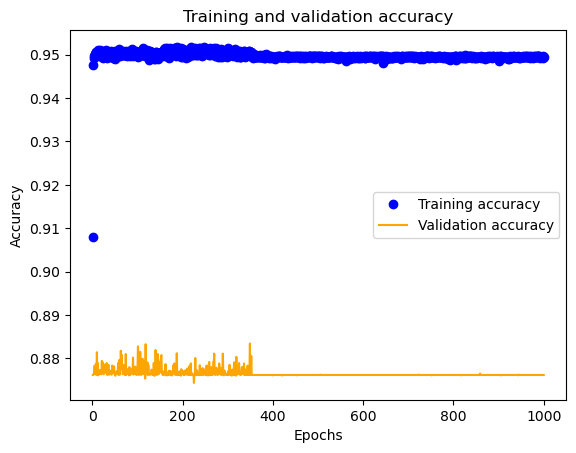

In [28]:
# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
print('Max training accuracy: ', np.max(acc))
print('Max validation accuracy: ', np.max(val_acc))

Max training accuracy:  0.9517857432365417
Max validation accuracy:  0.8834166526794434


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = np.round(model.predict(X),0)

# confusion matrix
confusion_matrix(y, preds)

1250/1250 [==============================] - 1s 372us/step


array([[37104,     0],
       [ 2896,     0]])

In [31]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     37104
           1       0.00      0.00      0.00      2896

    accuracy                           0.93     40000
   macro avg       0.46      0.50      0.48     40000
weighted avg       0.86      0.93      0.89     40000



/Users/mj/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mj/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mj/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
